In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Import Data

In [2]:
df = pd.read_csv('./dataset/pollution.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
df.shape

(5000, 10)

In [4]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [5]:
#Check for nulls
print(df.isnull().sum())

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [6]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [7]:
attributes = ["Temperature", "Humidity", "PM2.5", "PM10", "NO2", "SO2", "CO", "Proximity to Industrial Areas", "Population Density"]
Y = df.loc[:, ['Air Quality']].values
X = df.drop(['Air Quality'], axis = 1).values
X_df = pd.DataFrame(X, columns = attributes)
print(Y)
print(X)

[['Moderate']
 ['Moderate']
 ['Moderate']
 ...
 ['Moderate']
 ['Good']
 ['Moderate']]
[[ 29.8   59.1    5.2  ...   1.72   6.3  319.  ]
 [ 28.3   75.6    2.3  ...   1.64   6.   611.  ]
 [ 23.1   74.7   26.7  ...   1.63   5.2  619.  ]
 ...
 [ 25.9   78.2   14.2  ...   1.63   9.6  379.  ]
 [ 25.3   44.4   21.4  ...   0.89  11.6  241.  ]
 [ 24.1   77.9   81.7  ...   1.38   8.3  461.  ]]


### Standardizing Data

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = attributes)
X_scaled_df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity to Industrial Areas,Population Density
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917


### Correlation Between Variables

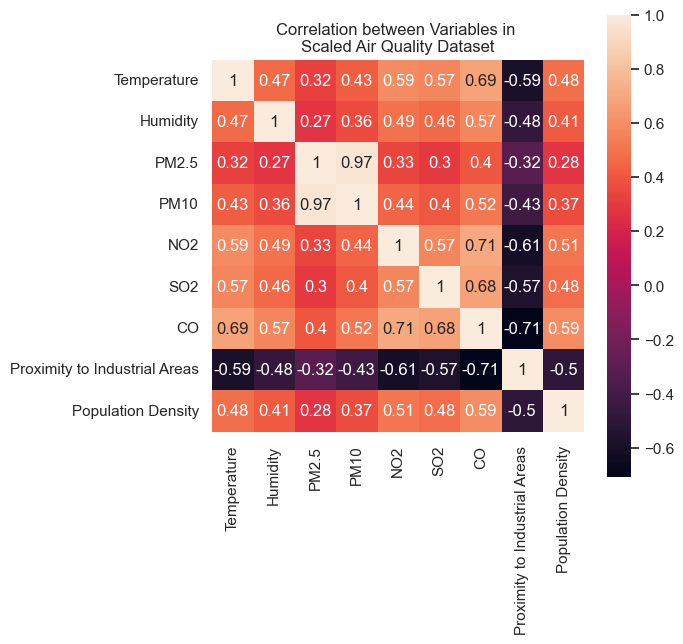

In [9]:
corr = X_scaled_df.corr()
plt.figure(figsize = (6,6))
ax = sns.heatmap(corr, square=True, annot=True)
plt.title('Correlation between Variables in \nScaled Air Quality Dataset')
plt.show()

## Regular PCA

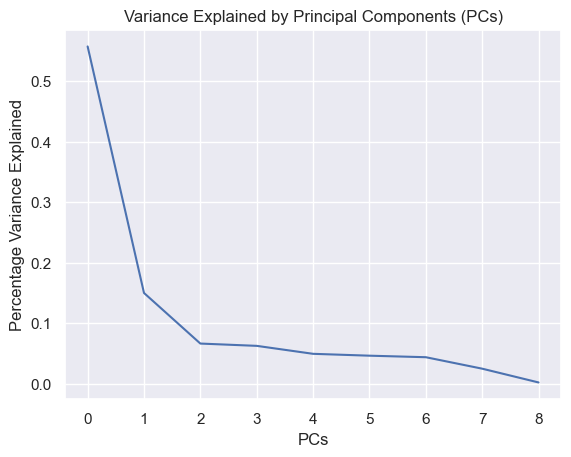

In [46]:
pca = PCA()
X_reduced = pca.fit_transform(X_scaled)

plt.figure()
percent_explained_var = pca.explained_variance_/sum(pca.explained_variance_)
plt.plot(range(0,len(pca.explained_variance_)), percent_explained_var)
plt.title("Variance Explained by Principal Components (PCs)")
plt.xlabel("PCs")
plt.ylabel("Percentage Variance Explained")
plt.show()

### Kernel PCA

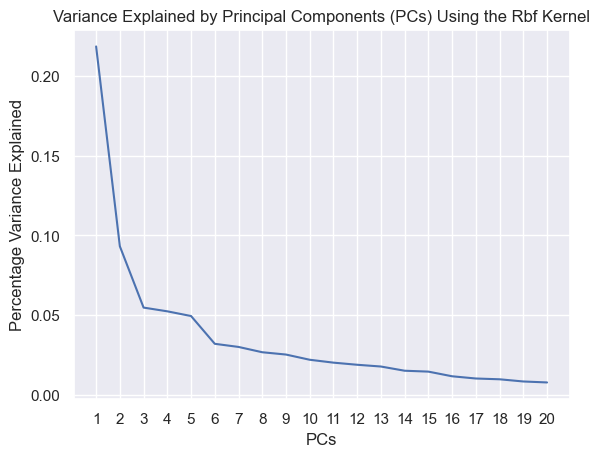

In [47]:
transformer = KernelPCA(kernel='rbf')
X_reduced = transformer.fit_transform(X_scaled)
explained_variance = np.var(X_reduced, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

plt.figure()
plt.plot(explained_variance_ratio[0:20])
plt.xticks(np.arange(20), range(1, 20+1))
plt.title("Variance Explained by Principal Components (PCs) Using the Rbf Kernel")
plt.xlabel("PCs")
plt.ylabel("Percentage Variance Explained")
plt.show()

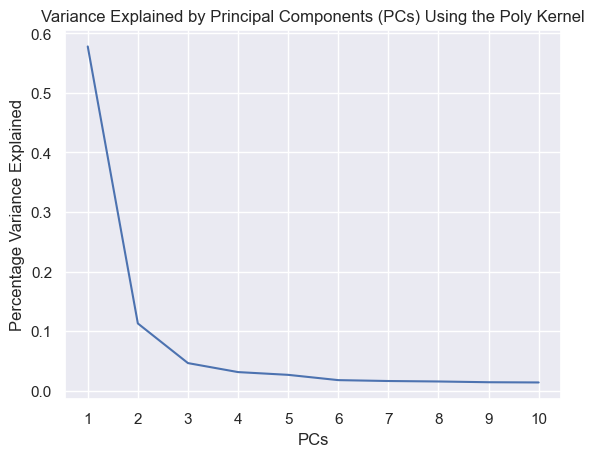

In [48]:
transformer = KernelPCA(kernel='poly')
X_reduced = transformer.fit_transform(X_scaled)
explained_variance = np.var(X_reduced, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

plt.figure()
plt.plot(explained_variance_ratio[0:10])
plt.xticks(np.arange(10), range(1, 10+1))
plt.title("Variance Explained by Principal Components (PCs) Using the Poly Kernel")
plt.xlabel("PCs")
plt.ylabel("Percentage Variance Explained")
plt.show()

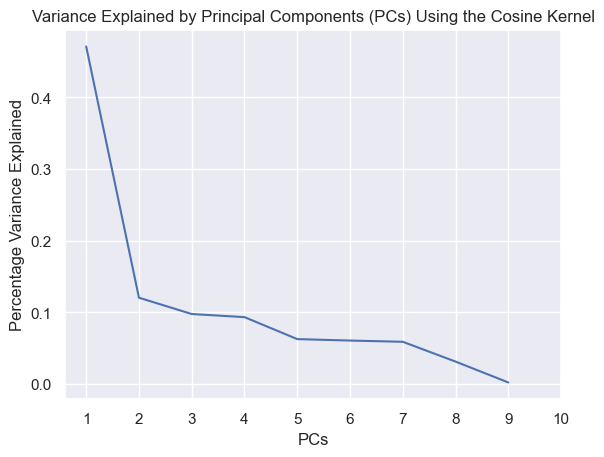

In [49]:
transformer = KernelPCA(kernel='cosine')
X_reduced = transformer.fit_transform(X_scaled)
explained_variance = np.var(X_reduced, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

plt.figure()
plt.plot(explained_variance_ratio[0:10])
plt.xticks(np.arange(10), range(1, 10+1))
plt.title("Variance Explained by Principal Components (PCs) Using the Cosine Kernel")
plt.xlabel("PCs")
plt.ylabel("Percentage Variance Explained")
plt.show()

### Logistic Regression

In [45]:
# with scaled data
lr_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y.ravel(), test_size = 0.2, shuffle = True)
    lr = LogisticRegression(random_state = 0).fit(X_train, Y_train)
    test_accuracy = lr.score(X_test, Y_test)
    lr_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(lr_test_accuracy)/NUM_TRIALS
print("Test accuracy average for logistic regression with scaled data: ", avg_test_accuracy)

Test accuracy average for logistic regression with scaled data:  0.943


In [15]:
# removing highly correlated variables (PM2.5 and PM10)
X_new_df = X_scaled_df.drop(['PM2.5', 'PM10'], axis = 1)

lr_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_new_df, Y.ravel(), test_size = 0.2, shuffle = True)
    lr = LogisticRegression(random_state = 0).fit(X_train, Y_train)
    test_accuracy = lr.score(X_test, Y_test)
    lr_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(lr_test_accuracy)/NUM_TRIALS
print("Test accuracy average for logistic regression with removed variables: ", avg_test_accuracy)

Test accuracy average for logistic regression with removed variables:  0.9348000000000001


In [16]:
# regular PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

lr_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca[:, 0:4], Y.ravel(), test_size = 0.2, shuffle = True)
    lr = LogisticRegression(random_state = 0).fit(X_train, Y_train)
    test_accuracy = lr.score(X_test, Y_test)
    lr_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(lr_test_accuracy)/NUM_TRIALS
print("Test accuracy average for logistic regression with regular PCA: ", avg_test_accuracy)


Test accuracy average for logistic regression with regular PCA:  0.9198000000000001


In [17]:
# kernel PCA (rbf) 
transformer = KernelPCA(kernel='rbf')
X_pca = transformer.fit_transform(X_scaled)

lr_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca[:, 0:4], Y.ravel(), test_size = 0.2, shuffle = True)
    lr = LogisticRegression(random_state = 0).fit(X_train, Y_train)
    test_accuracy = lr.score(X_test, Y_test)
    lr_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(lr_test_accuracy)/NUM_TRIALS
print("Test accuracy average for logistic regression with kernel PCA (rbf): ", avg_test_accuracy)


Test accuracy average for logistic regression with kernel PCA (rbf):  0.9003


In [18]:
# kernel PCA (poly)
transformer = KernelPCA(kernel='poly')
X_pca = transformer.fit_transform(X_scaled)

lr_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca[:, 0:4], Y.ravel(), test_size = 0.2, shuffle = True)
    lr = LogisticRegression(random_state = 0).fit(X_train, Y_train)
    test_accuracy = lr.score(X_test, Y_test)
    lr_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(lr_test_accuracy)/NUM_TRIALS
print("Test accuracy average for logistic regression with kernel PCA (poly): ", avg_test_accuracy)

Test accuracy average for logistic regression with kernel PCA (poly):  0.9159


In [19]:
transformer = KernelPCA(kernel='cosine')
X_pca = transformer.fit_transform(X_scaled)

lr_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca[:, 0:4], Y.ravel(), test_size = 0.2, shuffle = True)
    lr = LogisticRegression(random_state = 0).fit(X_train, Y_train)
    test_accuracy = lr.score(X_test, Y_test)
    lr_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(lr_test_accuracy)/NUM_TRIALS
print("Test accuracy average for logistic regression with kernel PCA (cosine): ", avg_test_accuracy)

Test accuracy average for logistic regression with kernel PCA (cosine):  0.8455


### SVM

In [20]:
# with scaled data
svm_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y.ravel(), test_size = 0.2, shuffle = True)
    classifier = svm.SVC(kernel='linear').fit(X_train, Y_train)
    test_accuracy = classifier.score(X_test, Y_test)
    svm_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(svm_test_accuracy)/NUM_TRIALS
print("Test accuracy average for SVM with scaled data: ", avg_test_accuracy)

Test accuracy average for SVM with scaled data:  0.942


In [21]:
# removing highly correlated variables (PM2.5 and PM10)
X_new_df = X_scaled_df.drop(['PM2.5', 'PM10'], axis = 1)

svm_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_new_df, Y.ravel(), test_size = 0.2, shuffle = True)
    classifier = svm.SVC(kernel='linear').fit(X_train, Y_train)
    test_accuracy = classifier.score(X_test, Y_test)
    svm_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(svm_test_accuracy)/NUM_TRIALS
print("Test accuracy average for SVM with removed variables: ", avg_test_accuracy)

Test accuracy average for SVM with removed variables:  0.9347


In [22]:
# regular PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

svm_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y.ravel(), test_size = 0.2, shuffle = True)
    classifier = svm.SVC(kernel='linear').fit(X_train, Y_train)
    test_accuracy = classifier.score(X_test, Y_test)
    svm_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(svm_test_accuracy)/NUM_TRIALS
print("Test accuracy average for SVM with regular PCA: ", avg_test_accuracy)

Test accuracy average for SVM with regular PCA:  0.9423


In [23]:
# kernel PCA (rbf)
transformer = KernelPCA(kernel='rbf')
X_pca = transformer.fit_transform(X_scaled)

svm_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y.ravel(), test_size = 0.2, shuffle = True)
    classifier = svm.SVC(kernel='linear').fit(X_train, Y_train)
    test_accuracy = classifier.score(X_test, Y_test)
    svm_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(svm_test_accuracy)/NUM_TRIALS
print("Test accuracy average for SVM with kernel PCA (rbf): ", avg_test_accuracy)

Test accuracy average for SVM with kernel PCA (rbf):  0.9449


In [24]:
# kernel PCA (poly)
transformer = KernelPCA(kernel='poly')
X_pca = transformer.fit_transform(X_scaled)

svm_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y.ravel(), test_size = 0.2, shuffle = True)
    classifier = svm.SVC(kernel='linear').fit(X_train, Y_train)
    test_accuracy = classifier.score(X_test, Y_test)
    svm_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(svm_test_accuracy)/NUM_TRIALS
print("Test accuracy average for SVM with kernel PCA (poly): ", avg_test_accuracy)

Test accuracy average for SVM with kernel PCA (poly):  0.9423


In [25]:
# kernel PCA (cosine)
transformer = KernelPCA(kernel='cosine')
X_pca = transformer.fit_transform(X_scaled)

svm_test_accuracy = []
NUM_TRIALS = 10
for trial in range(NUM_TRIALS):
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y.ravel(), test_size = 0.2, shuffle = True)
    classifier = svm.SVC(kernel='linear').fit(X_train, Y_train)
    test_accuracy = classifier.score(X_test, Y_test)
    svm_test_accuracy.append(test_accuracy)
avg_test_accuracy = sum(svm_test_accuracy)/NUM_TRIALS
print("Test accuracy average for SVM with kernel PCA (cosine): ", avg_test_accuracy)

Test accuracy average for SVM with kernel PCA (cosine):  0.8805


### KNN

In [26]:
# with scaled data
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_neighbors:
    knn_test_accuracy = []
    NUM_TRIALS = 10
    for trial in range(NUM_TRIALS):
        X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y.ravel(), test_size = 0.2, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
        test_accuracy = knn.score(X_test, Y_test)
        knn_test_accuracy.append(test_accuracy)
    avg_test_accuracy = sum(knn_test_accuracy)/NUM_TRIALS
    print("Test accuracy average for KNN (n = " + str(n) + ") with scaled data: " + str(avg_test_accuracy))

Test accuracy average for KNN (n = 1) with scaled data: 0.9112
Test accuracy average for KNN (n = 2) with scaled data: 0.8966000000000001
Test accuracy average for KNN (n = 3) with scaled data: 0.9208000000000001
Test accuracy average for KNN (n = 4) with scaled data: 0.9147000000000001
Test accuracy average for KNN (n = 5) with scaled data: 0.9275
Test accuracy average for KNN (n = 6) with scaled data: 0.9248000000000001
Test accuracy average for KNN (n = 7) with scaled data: 0.9218
Test accuracy average for KNN (n = 8) with scaled data: 0.9198999999999999
Test accuracy average for KNN (n = 9) with scaled data: 0.9221999999999999
Test accuracy average for KNN (n = 10) with scaled data: 0.9213000000000001


In [27]:
# removing highly correlated variables (PM2.5 and PM10)
X_new_df = X_scaled_df.drop(['PM2.5', 'PM10'], axis = 1)

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_neighbors:
    knn_test_accuracy = []
    NUM_TRIALS = 10
    for trial in range(NUM_TRIALS):
        X_train, X_test, Y_train, Y_test = train_test_split(X_new_df, Y.ravel(), test_size = 0.2, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
        test_accuracy = knn.score(X_test, Y_test)
        knn_test_accuracy.append(test_accuracy)
    avg_test_accuracy = sum(knn_test_accuracy)/NUM_TRIALS
    print("Test accuracy average for KNN (n = " + str(n) + ") with removed variables: " + str(avg_test_accuracy))

Test accuracy average for KNN (n = 1) with removed variables: 0.9136000000000001
Test accuracy average for KNN (n = 2) with removed variables: 0.9044000000000001
Test accuracy average for KNN (n = 3) with removed variables: 0.925
Test accuracy average for KNN (n = 4) with removed variables: 0.9225
Test accuracy average for KNN (n = 5) with removed variables: 0.9237
Test accuracy average for KNN (n = 6) with removed variables: 0.9251000000000001
Test accuracy average for KNN (n = 7) with removed variables: 0.9295
Test accuracy average for KNN (n = 8) with removed variables: 0.9237
Test accuracy average for KNN (n = 9) with removed variables: 0.9305
Test accuracy average for KNN (n = 10) with removed variables: 0.9265000000000001


In [28]:
# regular PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_neighbors:
    knn_test_accuracy = []
    NUM_TRIALS = 10
    for trial in range(NUM_TRIALS):
        X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y.ravel(), test_size = 0.2, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
        test_accuracy = knn.score(X_test, Y_test)
        knn_test_accuracy.append(test_accuracy)
    avg_test_accuracy = sum(knn_test_accuracy)/NUM_TRIALS
    print("Test accuracy average for KNN (n = " + str(n) + ") with regular PCA: " + str(avg_test_accuracy))

Test accuracy average for KNN (n = 1) with regular PCA: 0.9101000000000001
Test accuracy average for KNN (n = 2) with regular PCA: 0.8946
Test accuracy average for KNN (n = 3) with regular PCA: 0.9198999999999999
Test accuracy average for KNN (n = 4) with regular PCA: 0.9162000000000001
Test accuracy average for KNN (n = 5) with regular PCA: 0.925
Test accuracy average for KNN (n = 6) with regular PCA: 0.9205
Test accuracy average for KNN (n = 7) with regular PCA: 0.9259000000000001
Test accuracy average for KNN (n = 8) with regular PCA: 0.9194000000000001
Test accuracy average for KNN (n = 9) with regular PCA: 0.9272
Test accuracy average for KNN (n = 10) with regular PCA: 0.9233


In [29]:
# kernel PCA (rbf)
transformer = KernelPCA(kernel='rbf')
X_pca = transformer.fit_transform(X_scaled)

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_neighbors:
    knn_test_accuracy = []
    NUM_TRIALS = 10
    for trial in range(NUM_TRIALS):
        X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y.ravel(), test_size = 0.2, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
        test_accuracy = knn.score(X_test, Y_test)
        knn_test_accuracy.append(test_accuracy)
    avg_test_accuracy = sum(knn_test_accuracy)/NUM_TRIALS
    print("Test accuracy average for KNN (n = " + str(n) + ") with kernel PCA (rbf): " + str(avg_test_accuracy))

Test accuracy average for KNN (n = 1) with kernel PCA (rbf): 0.9117000000000001
Test accuracy average for KNN (n = 2) with kernel PCA (rbf): 0.8952
Test accuracy average for KNN (n = 3) with kernel PCA (rbf): 0.9233
Test accuracy average for KNN (n = 4) with kernel PCA (rbf): 0.9236000000000001
Test accuracy average for KNN (n = 5) with kernel PCA (rbf): 0.9237
Test accuracy average for KNN (n = 6) with kernel PCA (rbf): 0.9246000000000001
Test accuracy average for KNN (n = 7) with kernel PCA (rbf): 0.9252
Test accuracy average for KNN (n = 8) with kernel PCA (rbf): 0.923
Test accuracy average for KNN (n = 9) with kernel PCA (rbf): 0.9208000000000001
Test accuracy average for KNN (n = 10) with kernel PCA (rbf): 0.9218


In [30]:
# kernel PCA (poly)
transformer = KernelPCA(kernel='poly')
X_pca = transformer.fit_transform(X_scaled)

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_neighbors:
    knn_test_accuracy = []
    NUM_TRIALS = 10
    for trial in range(NUM_TRIALS):
        X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y.ravel(), test_size = 0.2, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
        test_accuracy = knn.score(X_test, Y_test)
        knn_test_accuracy.append(test_accuracy)
    avg_test_accuracy = sum(knn_test_accuracy)/NUM_TRIALS
    print("Test accuracy average for KNN (n = " + str(n) + ") with kernel PCA (poly): " + str(avg_test_accuracy))

Test accuracy average for KNN (n = 1) with kernel PCA (poly): 0.9115
Test accuracy average for KNN (n = 2) with kernel PCA (poly): 0.8996000000000001
Test accuracy average for KNN (n = 3) with kernel PCA (poly): 0.9232000000000001
Test accuracy average for KNN (n = 4) with kernel PCA (poly): 0.9187000000000001
Test accuracy average for KNN (n = 5) with kernel PCA (poly): 0.9203000000000001
Test accuracy average for KNN (n = 6) with kernel PCA (poly): 0.921
Test accuracy average for KNN (n = 7) with kernel PCA (poly): 0.9206
Test accuracy average for KNN (n = 8) with kernel PCA (poly): 0.9183
Test accuracy average for KNN (n = 9) with kernel PCA (poly): 0.9206
Test accuracy average for KNN (n = 10) with kernel PCA (poly): 0.9198999999999999


In [31]:
# kernel PCA (cosine)
transformer = KernelPCA(kernel='cosine')
X_pca = transformer.fit_transform(X_scaled)

n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in n_neighbors:
    knn_test_accuracy = []
    NUM_TRIALS = 10
    for trial in range(NUM_TRIALS):
        X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y.ravel(), test_size = 0.2, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
        test_accuracy = knn.score(X_test, Y_test)
        knn_test_accuracy.append(test_accuracy)
    avg_test_accuracy = sum(knn_test_accuracy)/NUM_TRIALS
    print("Test accuracy average for KNN (n = " + str(n) + ") with kernel PCA (cosine): " + str(avg_test_accuracy))

Test accuracy average for KNN (n = 1) with kernel PCA (cosine): 0.8329000000000001
Test accuracy average for KNN (n = 2) with kernel PCA (cosine): 0.8164
Test accuracy average for KNN (n = 3) with kernel PCA (cosine): 0.836
Test accuracy average for KNN (n = 4) with kernel PCA (cosine): 0.8366999999999999
Test accuracy average for KNN (n = 5) with kernel PCA (cosine): 0.8389
Test accuracy average for KNN (n = 6) with kernel PCA (cosine): 0.8349
Test accuracy average for KNN (n = 7) with kernel PCA (cosine): 0.849
Test accuracy average for KNN (n = 8) with kernel PCA (cosine): 0.8387
Test accuracy average for KNN (n = 9) with kernel PCA (cosine): 0.8427999999999999
Test accuracy average for KNN (n = 10) with kernel PCA (cosine): 0.8436
